<h1 align="center">Trading with Fibonacci Retracements</h1>

#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

## Data Extraction

In [40]:
def extract_stock_data(symbol, start_date, end_date):
    try:
        # Appended '.NS' to the stock symbol to indicate that it is an NSE-listed company.
        stock_data = yf.download(symbol + ".NS", start=start_date, end=end_date)
        return stock_data
    except Exception as e:
        print(f"An error occurred while extracting data: {e}")
        return None

# Define the stock symbol, start date,
# and end date for data extraction
stock_symbol = "RELIANCE"
start_date = "2020-01-01"
end_date = "2023-07-02"

# Extract stock data
df = extract_stock_data(stock_symbol, start_date, end_date)

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1503.745972,1512.760498,1491.363403,1495.424927,1480.595825,6463060
2020-01-02,1497.802368,1526.480469,1497.802368,1520.883545,1505.802124,8173308
2020-01-03,1518.605103,1527.173950,1508.699097,1522.716187,1507.616455,9684434
2020-01-06,1505.727173,1513.552979,1483.933838,1487.400879,1472.651367,11315596
2020-01-07,1504.736572,1520.091064,1499.288208,1510.284058,1495.307617,7699489
...,...,...,...,...,...,...
2023-06-22,2556.000000,2573.300049,2532.000000,2535.500000,2535.500000,3516244
2023-06-23,2528.899902,2533.399902,2512.000000,2514.750000,2514.750000,3059084
2023-06-26,2507.000000,2515.399902,2488.699951,2495.550049,2495.550049,5833893


## Calculating Fibonacci retracement levels

In [41]:
# Calculate swing high and swing low points
high_point = df['High'].max()
low_point = df['Low'].min()

# Apply Fibonacci retracement levels
fib_levels = [0.236, 0.382, 0.5, 0.618, 0.786]
diff = high_point - low_point
retracement_levels = [high_point - (level * diff) for level in fib_levels]
retracement_levels

[2386.811456298828,
 2096.4580108642576,
 1861.7887878417969,
 1627.119564819336,
 1293.0142303466796]

## Identifing potential entry points

In [42]:
entry_points = []
for level in retracement_levels:
    # Calculate the range around the retracement level
    range_min = level - (0.01 * diff)
    range_max = level + (0.01 * diff)

    # Check if the closing price is within the range
    entry_candidates = df[(df['Close'] >= range_min) &
                          (df['Close'] <= range_max)]

    # If there are entry candidates,
    # select the one closest to the retracement level
    if not entry_candidates.empty:
        closest_entry = entry_candidates['Close'].iloc[0]
        entry_points.append(closest_entry)

# Recommend potential entry points
if len(entry_points) > 0:
    print("Potential entry points:")
    for entry in entry_points:
        print(entry)
else:
    print("No potential entry points found.")

Potential entry points:
2388.5
2096.64990234375
1851.800048828125
1614.550048828125
1303.7913818359375


## Plotting the retracement levels and potential entry points

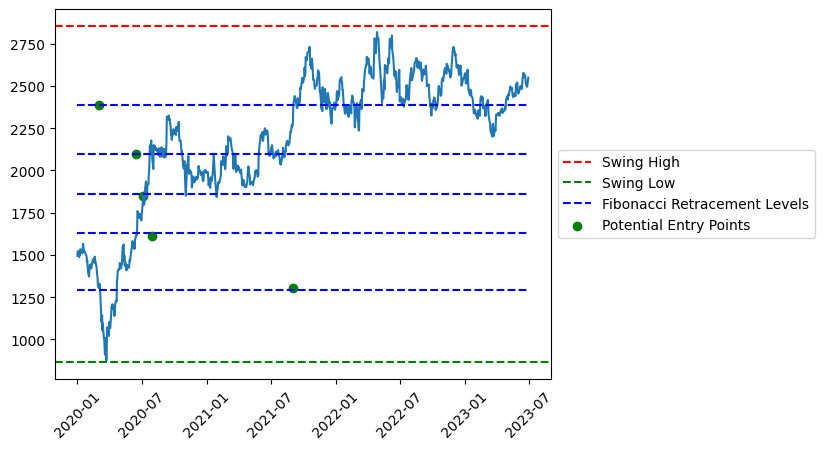

In [49]:
plt.plot(df.index, df['Close'])
plt.axhline(high_point, color='r', linestyle='--', label='Swing High')
plt.axhline(low_point, color='g', linestyle='--', label='Swing Low')
plt.hlines(retracement_levels, xmin=df.index[0], xmax=df.index[-1],
           colors='b', linestyles='--', label='Fibonacci Retracement Levels')

if len(entry_points) > 0:
    plt.scatter(df.loc[df['Close'].isin(entry_points)].index, entry_points,
                marker='o', c='green', label='Potential Entry Points')

plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()